# Dataset 1: Heart Disease  

Download the Heart Disease Dataset and Predict the health condition of the patient. 

Remember that you must split your data to training and test set. 

If the goal field is < 2, treat that the sample belongs to a healthy person.

Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [21]:
from sklearn import datasets, preprocessing, metrics 
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings('ignore')

In [22]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data = pd.read_csv('processed.cleveland.csv', header=None, names=columns)

14 attributes used:
    
1. age: age in years
    
2. sex: sex (1 = male; 0 = female)

3. cp: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 

5. chol: serum cholestoral in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg: resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment( 1 = upsloping, 2 = flat, 3 = downsloping )

12.ca: number of major vessels (0-3) colored by flourosopy

13.thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.num: the predicted attribute

The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
# look for NaN values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [25]:
# preprocessing

# Update NaN values with mean of the respective column values
data['ca'] = data.ca.fillna(data.ca.mean())
data['thal'] = data.thal.fillna(data.thal.mean())

# If the goal field is < 2, we treat that the sample belongs to a healthy person.
data['num'] = data.num.map({0: 0, 1: 0, 2: 1, 3: 1, 4: 1})

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


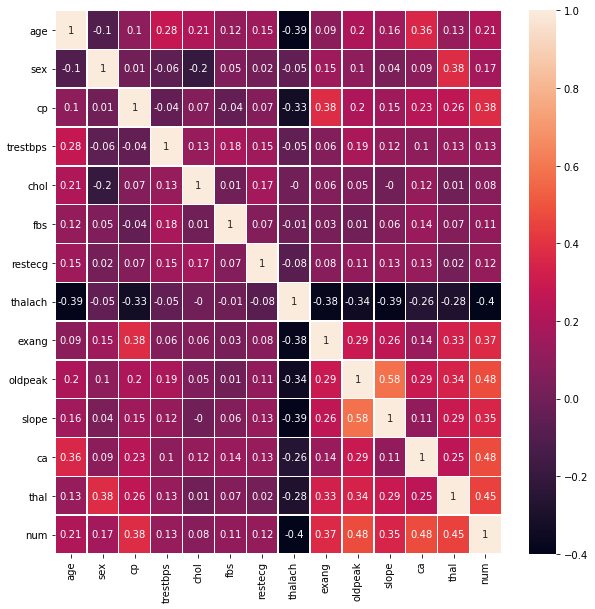

In [27]:
# Correlation matrix measures the linear relationships between the variables
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)
plt.show()

### Logistic Regression (using all features)

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Normalize features
X = min_max_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [29]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
dt_classifier = DecisionTreeClassifier()
classifiers.append(dt_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
sv_classifier = SVC()
classifiers.append(sv_classifier)

classifiers

[LogisticRegression(),
 DecisionTreeClassifier(),
 KNeighborsClassifier(),
 LinearDiscriminantAnalysis(),
 GaussianNB(),
 SVC()]

In [30]:
Y_pred_train = classifier.predict(X_train)
print(f'Training Set: Binary cross-entropy loss: {log_loss(Y_train, Y_pred_train)}')
Y_pred_test = classifier.predict(X_test)
print(f'Test Set: Binary cross-entropy loss: {log_loss(Y_test, Y_pred_test)}')

Training Set: Binary cross-entropy loss: 4.3988479161996255
Test Set: Binary cross-entropy loss: 5.693257620969686


In [31]:
print(f'Training set: Accuracy = {accuracy_score(Y_train, Y_pred_train)}')
print(f'Test set: Accuracy = {accuracy_score(Y_test, Y_pred_test)}')

Training set: Accuracy = 0.8726415094339622
Test set: Accuracy = 0.8351648351648352


In [33]:
for classifier in classifiers:
    print(classifier)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
    print("Precision:",metrics.precision_score(Y_test, y_pred))
    print("Recall:",metrics.recall_score(Y_test, y_pred))
    print("----")

LogisticRegression()
Accuracy: 0.8351648351648352
Precision: 0.7272727272727273
Recall: 0.64
----
DecisionTreeClassifier()
Accuracy: 0.7802197802197802
Precision: 0.6190476190476191
Recall: 0.52
----
KNeighborsClassifier()
Accuracy: 0.8241758241758241
Precision: 0.68
Recall: 0.68
----
LinearDiscriminantAnalysis()
Accuracy: 0.8351648351648352
Precision: 0.7083333333333334
Recall: 0.68
----
GaussianNB()
Accuracy: 0.8241758241758241
Precision: 0.6551724137931034
Recall: 0.76
----
SVC()
Accuracy: 0.8461538461538461
Precision: 0.6896551724137931
Recall: 0.8
----
